In [2]:
!pip install easyocr
!pip install imutils

     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.9 MB 435.7 kB/s eta 0:00:07
     ---------------------------------------- 0.0/2.9 MB 435.7 kB/s eta 0:00:07
      --------------------------------------- 0.1/2.9 MB 328.2 kB/s eta 0:00:09
      --------------------------------------- 0.1/2.9 MB 328.2 kB/s eta 0:00:09
     - -------------------------------------- 0.1/2.9 MB 350.1 kB/s eta 0:00:08
     - -------------------------------------- 0.1/2.9 MB 400.9 kB/s eta 0:00:07
     -- ------------------------------------- 0.2/2.9 MB 446.5 kB/s eta 0:00:07
     -- ------------------------------------- 0.2/2.9 MB 436.9 kB/s eta 0:00:07
     -- ------------------------------------- 0.2/2.9 MB 436.8 kB/s eta 0:00:07
     -- ------------------------------------- 0.2/2.9 MB 436.8 kB/s eta 0:00:07
     --- ------------------------------------ 0.2/2.9 MB 4

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\python310\\Lib\\site-packages\\skimage\\restoration\\tests\\test_restoration.py'
Consider using the `--user` option or check the permissions.



  Using cached easyocr-1.6.2-py3-none-any.whl (2.9 MB)
  Using cached scikit_image-0.20.0-cp310-cp310-win_amd64.whl (23.7 MB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached opencv_python_headless-4.5.4.60-cp310-cp310-win_amd64.whl (35.0 MB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
  Using cached PyWavelets-1.4.1-cp310-cp310-win_amd64.whl (4.2 MB)
  Using cached imageio-2.27.0-py3-none-any.whl (3.4 MB)


In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils 
import easyocr


ModuleNotFoundError: No module named 'matplotlib'

In [4]:
!pip install matplotlib


     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
      --------------------------------------- 0.1/7.6 MB 4.0 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/7.6 MB 5.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.9/7.6 MB 6.0 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/7.6 MB 7.0 MB/s eta 0:00:01
     ----- ---------------------------------- 1.0/7.6 MB 7.0 MB/s eta 0:00:01
     ----- ---------------------------------- 1.0/7.6 MB 7.0 MB/s eta 0:00:01
     ----- ---------------------------------- 1.0/7.6 MB 7.0 MB/s eta 0:00:01
     ----- ---------------------------------- 1.0/7.6 MB 7.0 MB/s eta 0:00:01
     ----- ---------------------------------- 1.0/7.6 MB 7.0 MB/s eta 0:00:01
     ----- ---------------------------------- 1.0/7.6 MB 7.0 MB/s eta 0:00:01
     ------ --------------------------------- 1.2/7.6 MB 2.5 MB/s eta 0:00:03


ERROR: Exception:
Traceback (most recent call last):
  File "C:\python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\python310\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\python310\lib\ssl.py", line 1130, in read
    return self._sslobj.read(len, buffer)
ssl.SSLError: [SSL: DECRY

In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils 
import easyocr

ModuleNotFoundError: No module named 'matplotlib'

In [8]:
!pip install matplotlib


In [597]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils 
import easyocr
import pytesseract as tess
from PIL import Image


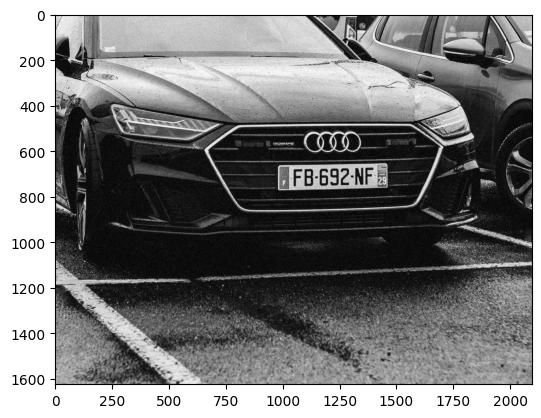

In [561]:
img=cv2.imread('image33.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB ))

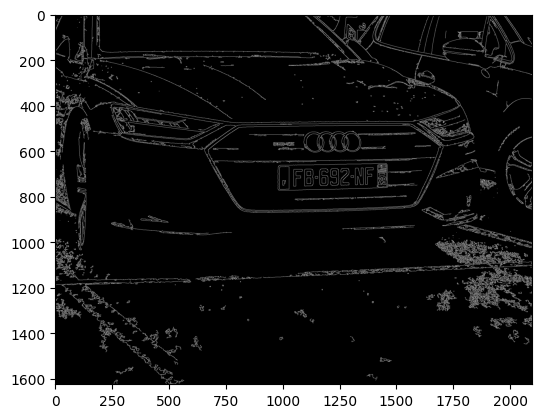

In [562]:
bfilter=cv2.bilateralFilter(gray,11,35,35)#noise reduction
edged=cv2.Canny(bfilter,40,400) #edge detection (canny is used to edge detection)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB ))

In [563]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours= imutils.grab_contours(keypoints)
contours= sorted(contours,key=cv2.contourArea, reverse=True)[:10]




In [564]:
location =None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location=approx
        break

In [556]:
location

In [565]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask, [location],0,255,  -1)
new_image=cv2.bitwise_and(img,img,mask=mask)


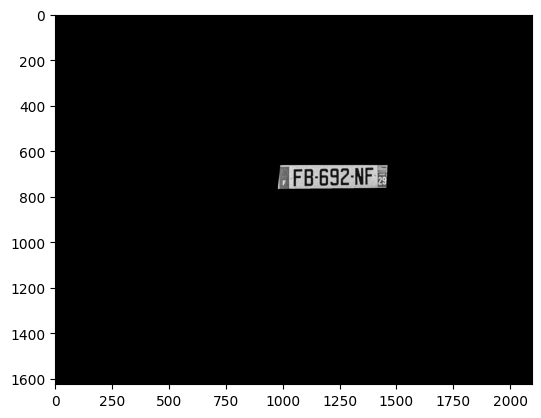

In [566]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [567]:
reader=easyocr.Reader(['en'])
result=reader.readtext(new_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[1031, 658], [1410, 658], [1410, 772], [1031, 772]],
  'FB 692NF',
  0.8727558191718829),
 ([[1410, 706], [1458, 706], [1458, 756], [1410, 756]],
  '29',
  0.9999286882770765)]

TypeError: 'list' object is not callable

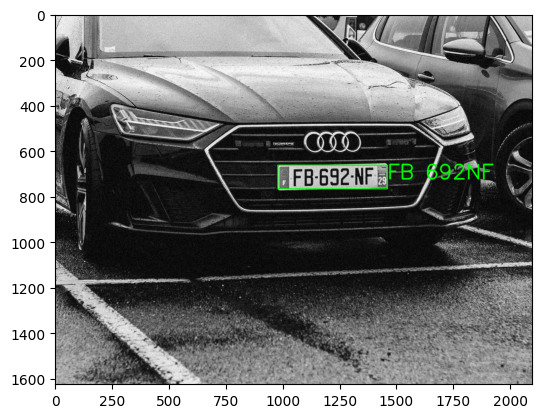

In [568]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res= cv2.putText(img, text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=3,color=(0,255,0),thickness=5,lineType=cv2.LINE_AA)
res= cv2.rectangle(img, tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

In [601]:
img=Image.open('image33.jpg')
text=tess.image_to_string(img)
text

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.